## Exercise 2
In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs= to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [1]:
import tensorflow as tf
from os import path, getcwd, chdir

#path to the dataset
path = f"{getcwd()}/../mnist.npz"

In [2]:
#define a call back class, to stop iteration if accuracy reaches 99%
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print('\n Reached 99% accuracy so cancelling training')
            self.model.stop_training = True

#load the dataset  
mnist = tf.keras.datasets.mnist

#create train and test sets
(x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)


train data 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 2

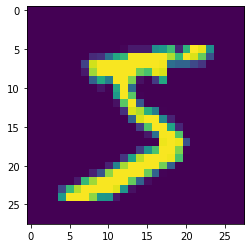

In [3]:
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(linewidth=200)
plt.imshow(x_train[0])
print('train data \n', x_train[0])
print('label \n', y_train[0])

In [4]:
#initialize callback class
callback = myCallBack()

#normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0


In [5]:
#create the model and try with 1024 neurons
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
# model fitting
history = model.fit(x_train, y_train, epochs = 10, callbacks = [callback])
# model fitting
print(history.epoch, history.history['accuracy'][-1])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 225us/sample - loss: 0.1840 - accuracy: 0.9438
Epoch 2/10
60000/60000 [==============================] - 11s 175us/sample - loss: 0.0737 - accuracy: 0.9777
Epoch 3/10
60000/60000 [==============================] - 13s 210us/sample - loss: 0.0485 - accuracy: 0.9847
Epoch 4/10
60000/60000 [==============================] - 14s 232us/sample - loss: 0.0364 - accuracy: 0.9883
Epoch 5/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0256 - accuracy: 0.9917
 Reached 99% accuracy so cancelling training
60000/60000 [==============================] - 14s 229us/sample - loss: 0.0256 - accuracy: 0.9917
[0, 1, 2, 3, 4] 0.9917


In [6]:
#create the model and try with 512 neurons
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
# model fitting
history = model.fit(x_train, y_train, epochs = 10, callbacks = [callback])
# model fitting
print(history.epoch, history.history['accuracy'][-1])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2032 - accuracy: 0.9406
Epoch 2/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0814 - accuracy: 0.9751
Epoch 3/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0542 - accuracy: 0.9830
Epoch 4/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0357 - accuracy: 0.9884
Epoch 5/10
59488/60000 [============================>.] - ETA: 0s - loss: 0.0278 - accuracy: 0.9910
 Reached 99% accuracy so cancelling training
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0279 - accuracy: 0.9910
[0, 1, 2, 3, 4] 0.9910167


In [7]:
#create the model and try with 256 neurons
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
# model fitting
history = model.fit(x_train, y_train, epochs = 10, callbacks = [callback])
# model fitting
print(history.epoch, history.history['accuracy'][-1])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2227 - accuracy: 0.9353
Epoch 2/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0917 - accuracy: 0.9726
Epoch 3/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0614 - accuracy: 0.9810
Epoch 4/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0428 - accuracy: 0.9866
Epoch 5/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0340 - accuracy: 0.9896
Epoch 6/10
59456/60000 [============================>.] - ETA: 0s - loss: 0.0248 - accuracy: 0.9924
 Reached 99% accuracy so cancelling training
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0249 - accuracy: 0.9923
[0, 1, 2, 3, 4, 5] 0.99235
